In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [10]:
#loading the Bookings dataset
data = pd.read_csv(r'C:\Users\gonca\Documents\BC2_Predict_Cancellations\data\H2.csv') 
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [16]:
Cancelations = data['IsCanceled'].tolist()
print(Cancelations.count(1), 'canceled')
print(Cancelations.count(0), 'not canceled')

33102 canceled
46228 not canceled


In [21]:
# Cheecking for duplicates
data.duplicated().sum()

25902

In [17]:
data.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30)

IsCanceled                     1.000000
LeadTime                       0.309242
TotalOfSpecialRequests         0.293889
PreviousCancellations          0.166643
BookingChanges                 0.149500
RequiredCarParkingSpaces       0.133096
IsRepeatedGuest                0.065840
DaysInWaitingList              0.060965
PreviousBookingsNotCanceled    0.053134
Adults                         0.053054
StaysInWeekNights              0.048704
Babies                         0.030186
Children                       0.027075
ADR                            0.011965
StaysInWeekendNights           0.007343
ArrivalDateDayOfMonth          0.004331
ArrivalDateYear                0.003004
ArrivalDateWeekNumber          0.001580
Name: IsCanceled, dtype: float64

In [22]:
# Splitting feature names into groups
non_metric_features = data.select_dtypes(include=['object']).columns
metric_features = data.select_dtypes(exclude=['object']).columns

Data_metric = data[metric_features]
Data_non_metric = data[non_metric_features]

In [23]:
data[non_metric_features]

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus,ReservationStatusDate
0,July,HB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,6,NULL,Transient,Check-Out,2015-07-03
1,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-07-01
2,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-04-30
3,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-06-23
4,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,394,NULL,Transient,Check-Out,2017-09-06
79326,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,9,NULL,Transient,Check-Out,2017-09-07
79327,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,9,NULL,Transient,Check-Out,2017-09-07
79328,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,89,NULL,Transient,Check-Out,2017-09-07


In [24]:
# Checking that no variable is left behind
len(metric_features) + len(non_metric_features) == len(data.columns)

True

In [42]:
Deposit = data['DepositType'].tolist()
print(Deposit.count('No Deposit     '), 'No depost')
print(Deposit.count('Non Refund     '), 'Not refound')

66442 No depost
12868 Not refound


In [36]:
len(data['DepositType']) == Deposit.count('No Deposit     ') + Deposit.count('Non Refund     ')

False

In [37]:
Deposit.count('No Deposit     ') + Deposit.count('Non Refund     ')

79310

In [41]:
len(data['DepositType'])

79330

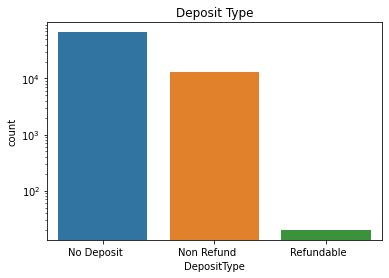

In [47]:
sns.countplot('DepositType', data=data)
plt.title('Deposit Type')
plt.yscale("log")